## Q1a.
1Mbp * 5 /100 = 50,000 reads

## Q1b.

In [173]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.special import factorial
from graphviz import Digraph
import copy
import networkx as nx

In [126]:
def simulate_sequencing(mu,cov,RN):
    genome_length=1000000
    cov_array=np.zeros(genome_length)
    for i in range(RN):
        start_pos=int(random.random()*genome_length)
        cov_array[start_pos:start_pos+100]+=1
    
    fig,ax=plt.subplots()
    plt.hist(cov_array,bins=20,alpha=0.5,density=True,label='simulated coverage')
    ax.set_xlabel('coverage')
    ax.set_ylabel('number')
    ax.set_title('Distribution of coverage')
    X=np.arange(0,20)
    plt.plot( X, poisson.pmf(X,mu), '-' ,label='possion distribution')
    plt.legend()
    
    
    
    return cov_array
def calculate_rate(cov_array):
    genome_length=1000000
    noseq=list(cov_array1).count(0)
    per=noseq/genome_length
    print('Base has not been sequenced:'+'\n',noseq, '\n'+ 'percent of genome:'+'\n',float(per))
    

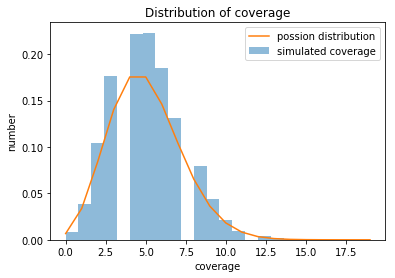

In [127]:
cov_array1=simulate_sequencing(mu=5,cov=5,RN=50000)


## Q 1c.

In [128]:
calculate_rate(cov_array1)

Base has not been sequenced:
 6295 
percent of genome:
 0.006295


To make the bin width equal the x axis unit, bins number =20, and the poisson distribution correctly estimate the mean coverage.

## Q 1d.

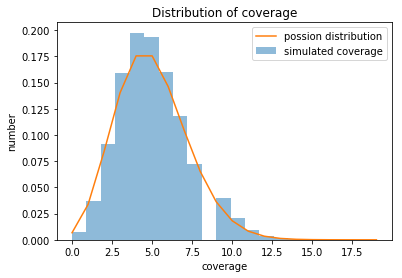

In [129]:
cov_array1=simulate_sequencing(mu=5,cov=15,RN=50000)


In [130]:
calculate_rate(cov_array1)

Base has not been sequenced:
 6607 
percent of genome:
 0.006607


After adding the coverage, the possion distribution is more similar to the coverage distribution.

## Q2

In [259]:
def dbg_construction(input_seqs):
    kmers=[]
    for seq in input_seqs:
        for i in range(len(seq)-3+1):
            kmers.append(seq[i:i+3])
    nodes= list(set(kmers))
    print(nodes)
    edges=[]
    sublist=copy.deepcopy(nodes)
    for i in range(len(sublist)):
        
        start1=sublist[0]
        end2=sublist[0]
        others=copy.deepcopy(sublist)
        others.remove(others[0])
        for item in others:
#             print(item[0:2],kmer [1:3])
            if item[0:2] == sublist[0] [1:3]:
                end1=item
                edges.append((start1,end1))
         
            if item[1:3] == sublist[0] [0:2]:
                start2=item
                edges.append((start2,end2))
        sublist.remove(sublist[0])
    print(edges)
    return edges,nodes

def netplot(edges,nodes):       
    u = Digraph()
    u = Digraph('unix', filename='signal.gv')
    u.attr(size='12,12')
    u.node_attr.update(color='lightblue2', style='filled')
    for edge in edges:
        u.edge(edge[0], edge[1]) 
    u.view()

In [262]:
input_seqs=['ATTCA','ATTGA',
'CATTG',
'CTTAT',
'GATTG',
'TATTT',
'TCATT',
'TCTTA',
'TGATT',
'TTATT',
'TTCAT',
'TTCTT',
'TTGAT']
edges,nodes=dbg_construction(input_seqs)
netplot(edges,nodes)

['TCT', 'TGA', 'TCA', 'CAT', 'TTA', 'TTT', 'TAT', 'TTG', 'ATT', 'TTC', 'CTT', 'GAT']
[('TTC', 'TCT'), ('TCT', 'CTT'), ('TTG', 'TGA'), ('TGA', 'GAT'), ('TCA', 'CAT'), ('TTC', 'TCA'), ('CAT', 'ATT'), ('TTT', 'TTA'), ('TTA', 'TAT'), ('ATT', 'TTA'), ('CTT', 'TTA'), ('TTT', 'TTG'), ('ATT', 'TTT'), ('TTT', 'TTC'), ('CTT', 'TTT'), ('TAT', 'ATT'), ('ATT', 'TTG'), ('CTT', 'TTG'), ('ATT', 'TTC'), ('GAT', 'ATT'), ('CTT', 'TTC')]


In [258]:
print(nodes)

['TCT', 'TGA', 'TCA', 'CAT', 'TTA', 'TTT', 'TAT', 'TTG', 'ATT', 'TTC', 'CTT', 'GAT']


## Q2b.


In [281]:
seq='TGA'
node_dict={}
n=0
for node in nodes:
    node_dict.setdefault(node,0)
while n <20:
    for edge in edges:
        if (edge[0]==seq[-4:-1]) and (node_dict[edge[1]]<=4):
            seq=seq+edge[1][2]
            
            node_dict[edge[1]]+=1
        if (edge[1]==seq[0:3])and (node_dict[edge[0]]<=4):
            seq=edge[0][0]+seq
            node_dict[edge[0]]+=1
    n+=1
print(seq)

TTCTTTCTTTCTTTCTTTCTTATTATTATTATTATTTGAAT


## Q 2c.

We should go back to the reads to make sure the generated sequence is correct